<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/Clustering_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])

In [4]:
df_xy.X = X
df_xy.Y = Y

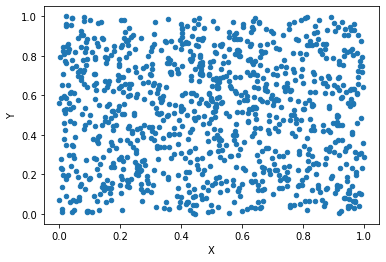

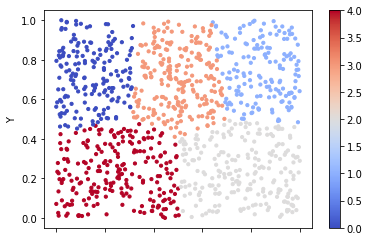

In [5]:
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)
model1.labels_
model1.cluster_centers_
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [6]:
Univ = pd.read_csv("/content/Universities.csv")

In [7]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [8]:
df_norm = norm_func(Univ.iloc[:,1:])

In [11]:
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [12]:
k = list(range(2,15))

In [13]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7f807cb562d0>,
 <a list of 13 Text major ticklabel objects>)

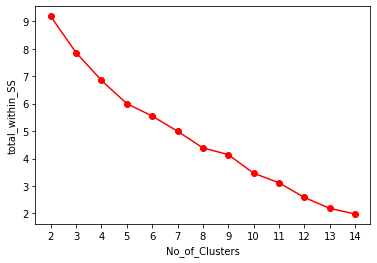

In [16]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [17]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [18]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [19]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]

Univ.iloc[:,1:7].groupby(Univ.clust).mean()


,SAT,Top10,Accept,SFRatio,Expenses
clust,,,,,
0,1363.571429,91.428571,21.428571,10.571429,35475.142857
1,1061.500000,38.750000,70.000000,19.250000,9953.000000
2,1226.666667,74.000000,55.666667,14.000000,18545.333333
3,1274.444444,80.000000,34.888889,12.444444,24295.555556
4,1360.000000,87.500000,34.500000,6.500000,61133.000000


In [20]:
Univ.to_csv("Univsersity.csv")